**QUESTION 1**

**Part 1**

In [ ]:
### importing all the necessary libraries here #### 
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 


In [ ]:
### Converting given excel file into numpy array###
df = pd.read_excel('DATASET.xlsx')
K=np.array(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Computing the Mean and scatter matrix and de-mean all the data points i.e subtract the mean from all the data points.###

L=K[:,0]
D=K[:,1:K.shape[1]]
a,b=D.shape
M=np.zeros((b,1));
SM = np.zeros((b,b));
for i in range (0,b):
  M[i]=np.mean(D[:,i])
for i in range(0,a):
  d=D[i,:].reshape(b,1)
  d=d-M
  SM+=np.dot(d,d.T)

In [ ]:
### finding the eigen values and eigen vectors of scatter matrix ###

A,B=np.linalg.eig(SM)
eig_pairs = [(np.abs(A[i]), B[:,i]) for i in range(len(A))]


In [ ]:
### finding the top 50 eigen values and corresponding eigen vectors ###

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
Evec=[];
Eval=[];

for i in eig_pairs[0:50]:
    Eval.append(i[0])
    Evec.append(i[1])
Evec=np.array(Evec)
Eval=np.array(Eval)




In [ ]:
### project all the data points on these 50 eigen vectors ###
fdata=np.dot(D,Evec.T)

### Now after projecting these data points on top 50 eigen vectors we are asked to find the error ### 
u=np.dot(fdata,Evec)
k=[];
for i in range(0,a):
  d=u[i,:].reshape(b,1)
  d=d+M
  k.append(d.reshape(b,))

### finding error 
j=np.linalg.norm(D-k)

In [ ]:
### Creating functions to call for different dimensions

def PCA (no_of_dim):
  c=no_of_dim;
  Evec=[];
  Eval=[];

  for i in eig_pairs[0:c]:
    Eval.append(i[0])
    Evec.append(i[1])
  Evec=np.array(Evec)
  Eval=np.array(Eval)
  fdata=np.dot(D,Evec.T)
  u=np.dot(fdata,Evec)
  k=[];
  for i in range(0,a):
    d=u[i,:].reshape(b,1)
    d=d+M
    k.append(d.reshape(b,))


  ### finding error
  j=np.linalg.norm(D-k) 
  return j
  
def Error (E,dim):
  Evaln=[];
  Evald=[];

  for i in E[0:dim]:
    Evaln.append(i[0])
  for i in E[dim:b]:
    Evald.append(i[0])
  num=np.sum(Evaln)
  den=np.sum(Evald)
  acc=num/(den+num);
  
  return acc



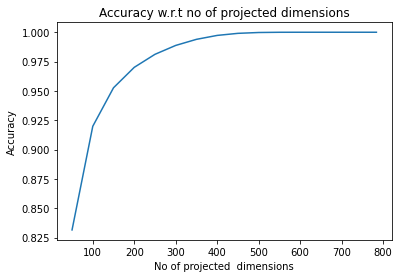

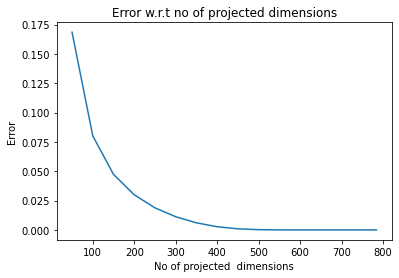

In [ ]:
### Also plot the value of error with respect to different number of projected dimensions ### 
### i.e with respect to different principle components is shown below ###
### Your Code stats here ###


###    TO PLOT COST WRT PROJECTED DIMENSIONS 
### jx=[50,100,200,300,400,500,600,700,750,785];
### jy=[PCA(50),PCA(100),PCA(200),PCA(300),PCA(400),PCA(500),PCA(600),PCA(700),PCA(750),PCA(785)];
### plt.plot(jx,jy)
### plt.xlabel('No of projected  dimensions')
### plt.ylabel('Value of cost function ')
### plt.title('Cost w.r.t no of projected dimensions')
### plt.show()


ax=[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,784]
ay=[Error(eig_pairs,50),Error(eig_pairs,100),Error(eig_pairs,150),Error(eig_pairs,200),Error(eig_pairs,250),Error(eig_pairs,300),Error(eig_pairs,350),Error(eig_pairs,400),Error(eig_pairs,450),Error(eig_pairs,500),Error(eig_pairs,550),Error(eig_pairs,600),Error(eig_pairs,650),Error(eig_pairs,700),Error(eig_pairs,750),Error(eig_pairs,784)]
plt.plot(ax,ay)
plt.xlabel('No of projected  dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy w.r.t no of projected dimensions')
plt.show()


ax=[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,784]
ay=[1-Error(eig_pairs,50),1-Error(eig_pairs,100),1-Error(eig_pairs,150),1-Error(eig_pairs,200),1-Error(eig_pairs,250),1-Error(eig_pairs,300),1-Error(eig_pairs,350),1-Error(eig_pairs,400),1-Error(eig_pairs,450),1-Error(eig_pairs,500),1-Error(eig_pairs,550),1-Error(eig_pairs,600),1-Error(eig_pairs,650),1-Error(eig_pairs,700),1-Error(eig_pairs,750),1-Error(eig_pairs,784)]
plt.plot(ax,ay)
plt.xlabel('No of projected  dimensions')
plt.ylabel('Error')
plt.title('Error w.r.t no of projected dimensions')
plt.show()

### Your code ends here ###

**Part 2**

In [ ]:
### import all the necessary libraries here ####

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import  confusion_matrix



In [ ]:
### Read the dataset in part 1 with reduced dimensions ###


La=np.zeros((L.shape[0],1))
print(len(La))
for i in range(0,L.shape[0]):
  if L[i]==0:
    La[i]=0;
  elif L[i]==2:
    La[i]=1;
  elif L[i]==4:
    La[i]=2;
  elif L[i]==6:
    La[i]=3;
  elif L[i]==8:
    La[i]=4;

X_Train=fdata[0:int((a/2))]#50% data samples for training 
X_Test=fdata[int((a/2)):int((a/2))+int((3*a/10))]# 30% for testing
X_Val=fdata[int((a/2))+int((3*a/10)):a]#20% for validation
Y_Train=La[0:int((a/2))]#50% data samples for training 
Y_Test=La[int((a/2)):int((a/2))+int((3*a/10))]# 30% for testing
Y_Val=La[int((a/2))+int((3*a/10)):a]#20% for validation

input_unit=X_Train.shape[1]
output_unit = 1
hidden_unit = int(2*input_unit/3)+output_unit



4929


In [ ]:
### Design the network with only one hidden layer ###


model = Sequential()
model.add(Dense(1000, activation='relu',input_shape=(input_unit,)))
model.add(Dense(5, activation='softmax'))
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
### Train the network with any optimizer ###


history = model.fit(X_Train, Y_Train,validation_data = (X_Val,Y_Val), epochs=100, batch_size=64)



Epoch 1/100
39/39 [==============================] - 1s 14ms/step - loss: 31.2221 - accuracy: 0.6738 - val_loss: 5.0206 - val_accuracy: 0.9138
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 2.3224 - accuracy: 0.9622 - val_loss: 4.4320 - val_accuracy: 0.9270
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.9836 - val_loss: 5.7819 - val_accuracy: 0.9249
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.9860 - val_loss: 5.3514 - val_accuracy: 0.9391
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.9838 - val_loss: 4.5467 - val_accuracy: 0.9402
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.9883 - val_loss: 3.8431 - val_accuracy: 0.9341
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.9901 - val_loss: 4.7900 - val_accuracy: 0.9391
Epoch 8/100

In [ ]:
### Get the accuracies for the test dataset and plot the confusion matrix ###

y_pred = model.predict(X_Test)

### Converting predictions to label

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,Y_Test)
print('Accuracy is:', a*100)
print('Confusion Matrix:')
print(confusion_matrix(Y_Test,pred))



Accuracy is: 97.49830966869506
Confusion Matrix:
[[311   2   1   1   4]
 [  2 292   3   1   4]
 [  0   0 264   1   1]
 [  2   0   2 293   3]
 [  4   2   3   1 282]]


**QUESTION 2**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils import data
import torchvision
import torchvision.transforms as transforms

In [ ]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        self.out = nn.Linear(1,1)  # 5*5 from image dimension
        

    def forward(self, x):
        
        x = self.out(x)
        
        return x

net = Net()


In [ ]:
### Define the Dataset and load the dataset ###



celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38])
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100])
celsius_q    = torch.from_numpy(celsius_q.astype(np.float32)).view(-1,1)
fahrenheit_a = torch.from_numpy(fahrenheit_a.astype(np.float32)).view(-1,1)
cel          = celsius_q
farh         = fahrenheit_a



In [ ]:
### Define the Loss function and the optimizer ###


model = Net()
error = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)



In [ ]:
### For specified number of iterations train the network and print the loss for each iteration ###

num_epochs = 3000;
losses = [];
accuracy_list = [];
for epoch in range(num_epochs):
  
    optimizer.zero_grad()
    outputs = model(cel)
    loss = error(outputs, farh)
    loss.backward()
    optimizer.step()

    losses.append(loss.data);
        
    if epoch%100==0:
      print ('Epoch : %d/%d,   Loss: %.4f '
                   %(epoch, num_epochs, loss.data))
      


Epoch : 0/3000,   Loss: 5030.2026 
Epoch : 100/3000,   Loss: 631.4553 
Epoch : 200/3000,   Loss: 429.9282 
Epoch : 300/3000,   Loss: 292.7245 
Epoch : 400/3000,   Loss: 199.3133 
Epoch : 500/3000,   Loss: 135.7171 
Epoch : 600/3000,   Loss: 92.4193 
Epoch : 700/3000,   Loss: 62.9411 
Epoch : 800/3000,   Loss: 42.8718 
Epoch : 900/3000,   Loss: 29.2082 
Epoch : 1000/3000,   Loss: 19.9057 
Epoch : 1100/3000,   Loss: 13.5724 
Epoch : 1200/3000,   Loss: 9.2605 
Epoch : 1300/3000,   Loss: 6.3249 
Epoch : 1400/3000,   Loss: 4.3262 
Epoch : 1500/3000,   Loss: 2.9655 
Epoch : 1600/3000,   Loss: 2.0391 
Epoch : 1700/3000,   Loss: 1.4084 
Epoch : 1800/3000,   Loss: 0.9790 
Epoch : 1900/3000,   Loss: 0.6866 
Epoch : 2000/3000,   Loss: 0.4876 
Epoch : 2100/3000,   Loss: 0.3521 
Epoch : 2200/3000,   Loss: 0.2598 
Epoch : 2300/3000,   Loss: 0.1970 
Epoch : 2400/3000,   Loss: 0.1543 
Epoch : 2500/3000,   Loss: 0.1251 
Epoch : 2600/3000,   Loss: 0.1053 
Epoch : 2700/3000,   Loss: 0.0918 
Epoch : 2800/

In [ ]:
#### Generate random Test sample and Test it with the trained network and report the error ###


celsius_t=np.array([0, 8, 15, 22, 38])
cel_t    = torch.from_numpy(celsius_t.astype(np.float32)).view(-1,1)
far=np.array([32, 46, 59, 72, 100])
far_t    = torch.from_numpy(far.astype(np.float32)).view(-1,1)

outputs = model(cel_t)
loss = error(outputs, far_t)
loss=loss.detach().numpy()
print('Test test set loss of the model is: %.4f ' % (loss))


Test test set loss of the model is: 0.0956 


**QUESTION 3**

In [ ]:


import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import  DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
#### Download the dataset ####

##Your Code starts here##
train_set = torchvision.datasets.FashionMNIST(root = './data/FashionMNIST',train = True,download = True,transform = transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST(root = './data/FashionMNIST',train = False,download = True,transform = transforms.Compose([transforms.ToTensor()]))

##Your Code ends here##


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
### Load the dataset by giving it to the dataloader ###


train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)


In [ ]:
### Define the Network ###
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out



In [ ]:
### Define the Loss function and the optimizer ###

model = Network()
model.to(device)
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



In [ ]:
### For specified number of epocs train the network and print the loss for each epoc ###

num_epochs = 5;
batch_size = 100;

losses = [];
accuracy_list = [];
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        
      
        optimizer.zero_grad()
        outputs = model(images)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()

      
        
        losses.append(loss.data);
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f '
                   %(epoch+1, num_epochs, i+1, len(train_set)//batch_size, loss.data))
            


Epoch : 1/5, Iter : 100/600,  Loss: 0.4447 
Epoch : 1/5, Iter : 200/600,  Loss: 0.4475 
Epoch : 1/5, Iter : 300/600,  Loss: 0.3850 
Epoch : 1/5, Iter : 400/600,  Loss: 0.4677 
Epoch : 1/5, Iter : 500/600,  Loss: 0.4912 
Epoch : 1/5, Iter : 600/600,  Loss: 0.2991 
Epoch : 2/5, Iter : 100/600,  Loss: 0.3000 
Epoch : 2/5, Iter : 200/600,  Loss: 0.3749 
Epoch : 2/5, Iter : 300/600,  Loss: 0.3761 
Epoch : 2/5, Iter : 400/600,  Loss: 0.3042 
Epoch : 2/5, Iter : 500/600,  Loss: 0.4373 
Epoch : 2/5, Iter : 600/600,  Loss: 0.1967 
Epoch : 3/5, Iter : 100/600,  Loss: 0.2279 
Epoch : 3/5, Iter : 200/600,  Loss: 0.2655 
Epoch : 3/5, Iter : 300/600,  Loss: 0.3314 
Epoch : 3/5, Iter : 400/600,  Loss: 0.2792 
Epoch : 3/5, Iter : 500/600,  Loss: 0.3383 
Epoch : 3/5, Iter : 600/600,  Loss: 0.1806 
Epoch : 4/5, Iter : 100/600,  Loss: 0.1703 
Epoch : 4/5, Iter : 200/600,  Loss: 0.1936 
Epoch : 4/5, Iter : 300/600,  Loss: 0.2956 
Epoch : 4/5, Iter : 400/600,  Loss: 0.3159 
Epoch : 4/5, Iter : 500/600,  Lo

In [ ]:
### Test the data with the remaining 30% data left out and print the accuracy ###
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.float())
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))



Test Accuracy of the model on the 10000 test images: 93.1683 %
